In [ ]:
#Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# We want our plots to be appeared inside the notebook
%matplotlib inline
# Models from sickit-learn(sklearn)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
# Model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve
# Model evaluation visualization
from sklearn import metrics
from sklearn.metrics import roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/heart_failure.csv')

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df.head(15)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298
age,75.0,55.00,65.0,50.0,65.0,90.0,75.0,60.0,65.00,80.0,75.0,62.0,45.0,50.0,49.0,82.0,87.0,45.0,70.0,48.0,65.0,65.0,68.0,53.0,75.00,80.0,95.0,70.0,58.0,82.0,94.00,85.0,50.0,50.0,65.0,69.0,90.0,82.0,60.0,60.0,...,53.0,55.0,62.0,65.0,68.0,61.0,50.0,55.00,56.0,45.0,40.0,44.00,51.0,67.0,42.0,60.0,45.0,70.0,70.0,50.0,55.0,70.0,70.0,42.0,65.00,50.0,55.0,60.0,45.0,65.00,90.0,45.0,60.0,52.0,63.0,62.0,55.0,45.0,45.0,50.0
anaemia,0.0,0.00,0.0,1.0,1.0,1.0,1.0,1.0,0.00,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.00,0.0,1.0,0.0,1.0,0.0,0.00,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.00,1.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,1.0,1.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
creatinine_phosphokinase,582.0,7861.00,146.0,111.0,160.0,47.0,246.0,315.0,157.00,123.0,81.0,231.0,981.0,168.0,80.0,379.0,149.0,582.0,125.0,582.0,52.0,128.0,220.0,63.0,582.00,148.0,112.0,122.0,60.0,70.0,582.00,23.0,249.0,159.0,94.0,582.0,60.0,855.0,2656.0,235.0,...,56.0,66.0,655.0,258.0,157.0,582.0,298.0,1199.00,135.0,582.0,582.0,582.00,582.0,213.0,64.0,257.0,582.0,618.0,582.0,1051.0,84.0,2695.0,582.0,64.0,1688.00,54.0,170.0,253.0,582.0,892.00,337.0,615.0,320.0,190.0,103.0,61.0,1820.0,2060.0,2413.0,196.0
diabetes,0.0,0.00,0.0,0.0,1.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.00,1.0,0.0,1.0,0.0,1.0,1.00,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.00,1.0,1.0,1.0,1.00,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.00,0.0,1.0,0.0,1.0,1.00,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
ejection_fraction,20.0,38.00,20.0,20.0,20.0,40.0,15.0,60.0,65.00,35.0,38.0,25.0,30.0,38.0,30.0,50.0,38.0,14.0,25.0,55.0,25.0,30.0,35.0,60.0,30.00,38.0,40.0,45.0,38.0,30.0,38.00,45.0,35.0,30.0,50.0,35.0,50.0,50.0,30.0,38.0,...,50.0,40.0,40.0,25.0,60.0,38.0,35.0,20.00,38.0,38.0,35.0,30.00,40.0,38.0,40.0,30.0,38.0,35.0,38.0,30.0,38.0,40.0,40.0,30.0,38.00,40.0,40.0,35.0,55.0,35.00,38.0,55.0,35.0,38.0,35.0,38.0,38.0,60.0,38.0,45.0
high_blood_pressure,1.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.00,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.00,0.0,1.0,1.0,0.0,0.0,1.00,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
platelets,265000.0,263358.03,162000.0,210000.0,327000.0,204000.0,127000.0,454000.0,263358.03,388000.0,368000.0,253000.0,136000.0,276000.0,427000.0,47000.0,262000.0,166000.0,237000.0,87000.0,276000.0,297000.0,289000.0,368000.0,263358.03,149000.0,196000.0,284000.0,153000.0,200000.0,263358.03,360000.0,319000.0,302000.0,188000.0,228000.0,226000.0,321000.0,305000.0,329000.0,...,308000.0,203000.0,283000.0,198000.0,208000.0,147000.0,362000.0,263358.03,133000.0,302000.0,222000.0,263358.03,221000.0,215000.0,189000.0,150000.0,422000.0,327000.0,25100.0,232000.0,451000.0,241000.0,51000.0,215000.0,263358.03,279000.0,336000.0,279000.0,543000.0,263358.03,390000.0,222000.0,133000.0,382000.0,179000.0,155000.0,270000.0,742000.0,140000.0,395000.0
serum_creatinine,1.9,1.10,1.3,1.9,2.7,2.1,1.2,1.1,1.50,9.4,4.0,0.9,1.1,1.1,1.0,1.3,0.9,0.8,1.0,1.9,1.3,1.6,0.9,0.8,1.83,1.9,1.0,1.3,5.8,1.2,1.83,3.0,1.0,1.2,1.0,3.5,1.0,1.0,2.3,3.0,...,0.7,1.0,0.7,1.4,1.0,1.2,0.9,1.83,1.7,0.9,1.0,1.60,0.9,1.2,0.7,1.0,0.8,1.1,1.1,0.7,1.3,1.0,2.7,3.8,1.10,0.8,1.2,1.7,1.0,1.10,0.9,0.8,1.4,1.0,0.9,1.1,1.2,0.8,1.4,1.6
serum_sodium,130.0,136.00,129.0,137.0,116.0,132.0,137.0,131.0,138.00,133.0,131.0,140.0,137.0,137.0,138.0,136.0,140.0,127.0,140.0,121.0,137.0,136.0,140.0,135.0,134.00,144.0,138.0,136.0,134.0,132.0,134.00,132.0,128.0,138.0,140.0,134.0,134.0,145.0,137.0

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
df.shape

(299, 13)

In [ ]:
df["ejection_fraction"].value_counts()

35    49
38    40
40    37
25    36
30    34
60    31
50    21
45    20
20    18
55     3
15     2
62     2
17     2
80     1
70     1
65     1
14     1
Name: ejection_fraction, dtype: int64

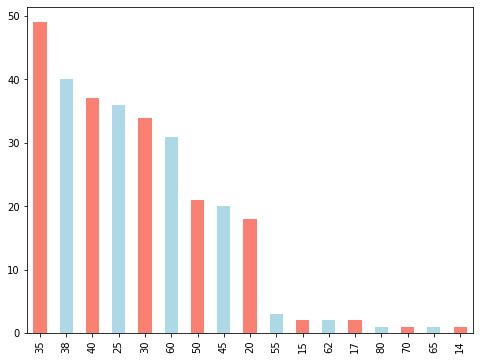

In [ ]:
df["ejection_fraction"].value_counts().plot(figsize=(8,6),kind="bar",color=["salmon","lightblue"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df["serum_sodium"].value_counts()

136    40
137    38
140    35
134    32
138    23
139    22
135    16
132    14
141    12
142    11
133    10
145     9
130     9
144     5
131     5
143     3
127     3
128     2
129     2
116     1
124     1
121     1
148     1
125     1
126     1
146     1
113     1
Name: serum_sodium, dtype: int64

In [ ]:
pd.crosstab(df.sex,df.smoking)

smoking,0,1
sex,,
0,101,4
1,102,92


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

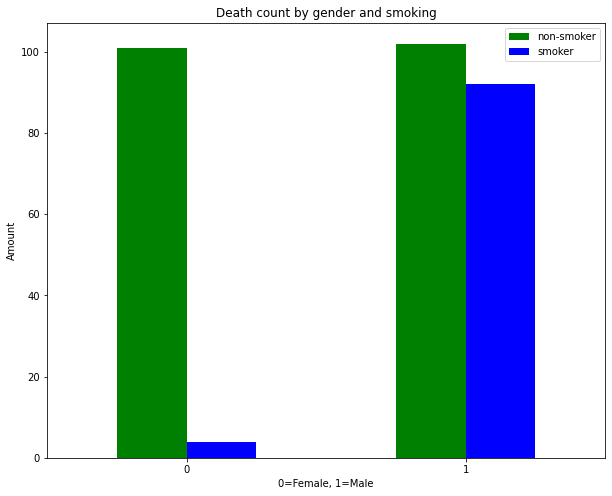

In [ ]:
pd.crosstab(df.sex,df.smoking).plot(figsize=(10,8),kind="bar",color=["green","blue"])
plt.title("Death count by gender and smoking")
plt.xlabel("0=Female, 1=Male")
plt.ylabel("Amount")
plt.legend(["non-smoker","smoker"])
plt.xticks(rotation=0)

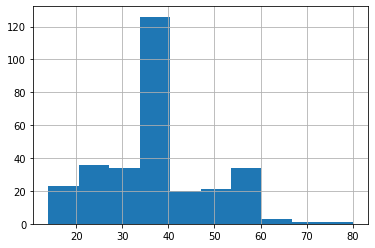

In [ ]:
df["ejection_fraction"].hist()

In [ ]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


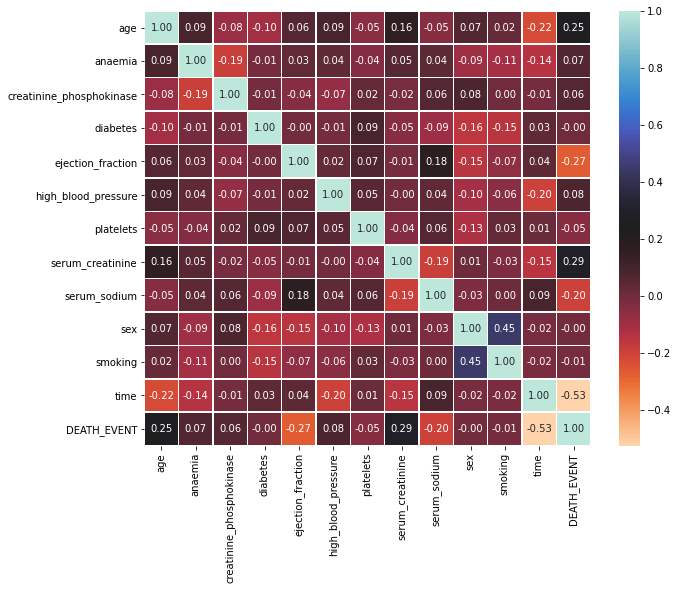

In [ ]:
plt.figure(figsize=(10,8))
corr_mtx=df.corr()
sns.heatmap(corr_mtx,annot=True,linewidths=0.5,fmt=".2f",cmap="icefire_r")

# Making the dataset ready for the models

In [ ]:
X=df.drop("DEATH_EVENT",axis=1)
Y=df["DEATH_EVENT"]

In [ ]:
numarr = Y.to_numpy()
print(numarr)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [ ]:
Y = pd.DataFrame(numarr)

In [ ]:
print(Y)

     0
0    1
1    1
2    1
3    1
4    1
..  ..
294  0
295  0
296  0
297  0
298  0

[299 rows x 1 columns]


In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [ ]:
Y

,0
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
X_test.shape

(90, 12)

In [ ]:
X_train.shape

(209, 12)

In [ ]:
Y_test.shape

(90, 1)

In [ ]:
Y_train.shape

(209, 1)

In [ ]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
89,57.0,1,115,0,25,1,181000.00,1.10,144,1,0,79
37,82.0,1,855,1,50,1,321000.00,1.00,145,0,0,30
13,50.0,1,168,0,38,1,276000.00,1.10,137,1,0,11
92,42.0,0,582,0,60,0,263358.03,1.18,137,0,0,82
21,65.0,1,128,1,30,1,297000.00,1.60,136,0,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...
280,70.0,0,2695,1,40,0,241000.00,1.00,137,1,0,247
23,53.0,0,63,1,60,0,368000.00,0.80,135,1,0,22
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8
161,45.0,1,130,0,35,0,174000.00,0.80,139,1,1,121


In [ ]:
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    np.random.seed(40)
    model_scores = {}
    for name ,model in models.items():
        model.fit(X_train,Y_train)
        model_scores[name] = model.score(X_test , Y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models, X_train, X_test, Y_train, Y_test)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


{'KNN': 0.5777777777777777,
 'Logistic Regression': 0.8333333333333334,
 'Random Forest': 0.8444444444444444}

In [ ]:
best_algo=""
best_accuracy=-1

# **The Models**

# Logistic Regresson

**train the Model**

In [ ]:
logisticModel = LogisticRegression()

In [ ]:
logisticModel.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**let the model predict on test data**

In [ ]:
predictions = logisticModel.predict(X_test)

In [ ]:
accuracy = logisticModel.score(X_test, Y_test)

In [ ]:
if accuracy>best_accuracy:
    best_algo="Logistic Regresson Model"
    best_accuracy=accuracy
print("Accuracy = {}".format(accuracy))

Accuracy = 0.8333333333333334


**Confusion Matrix**

In [ ]:
def plotConfusionMatrix(cm, accuracy):
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
    plt.title(all_sample_title, size = 15)

In [ ]:
cm = metrics.confusion_matrix(Y_test, predictions)

In [ ]:
print(cm)

[[55  2]
 [13 20]]


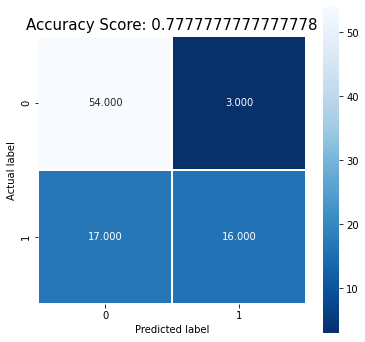

In [ ]:
plotConfusionMatrix(cm = cm, accuracy = accuracy)

In [ ]:
X_test.count()

age                         90
anaemia                     90
creatinine_phosphokinase    90
diabetes                    90
ejection_fraction           90
high_blood_pressure         90
platelets                   90
serum_creatinine            90
serum_sodium                90
sex                         90
smoking                     90
time                        90
dtype: int64

**Accuracy, Precision and  Recall**

In [ ]:
from operator import truediv
tp = np.diag(cm)
prec = list(map(truediv, tp, np.sum(cm, axis=0)))
rec = list(map(truediv, tp, np.sum(cm, axis=1)))
print("Accuracy = ",tp.sum()/cm.sum())
print("Precision = {}\nRecall = {}".format(prec,rec))
print("Avg Precision = {}\nAvg Recall = {}".format(np.sum(prec)/2, np.sum(rec)/2))

Accuracy =  0.7777777777777778
Precision = [0.7605633802816901, 0.8421052631578947]
Recall = [0.9473684210526315, 0.48484848484848486]
Avg Precision = 0.8013343217197924
Avg Recall = 0.7161084529505581


**ROC Curve Logistic Regression**

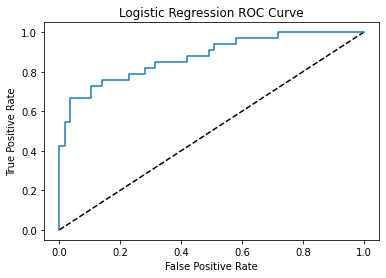

In [ ]:
y_pred_prob = logisticModel.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

# K Nearnest Neighber

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
predictions = knn.predict(X_test)

In [ ]:
accuracy = knn.score(X_test, Y_test)

In [ ]:
if accuracy>best_accuracy:
    best_algo="K Nearnest Neighber Model"
    best_accuracy=accuracy
print("Accuracy = {}".format(accuracy))

Accuracy = 0.5777777777777777


In [ ]:
cm = metrics.confusion_matrix(Y_test, predictions)

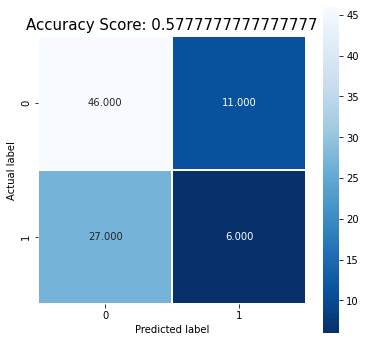

In [ ]:
plotConfusionMatrix(cm = cm, accuracy = accuracy)

In [ ]:
from operator import truediv
tp = np.diag(cm)
prec = list(map(truediv, tp, np.sum(cm, axis=0)))
rec = list(map(truediv, tp, np.sum(cm, axis=1)))
print("Accuracy = ",tp.sum()/cm.sum())
print("Avg Precision = {}\nAvg Recall = {}".format(np.sum(prec)/2, np.sum(rec)/2))

Accuracy =  0.5777777777777777
Avg Precision = 0.491539081385979
Avg Recall = 0.4944178628389154


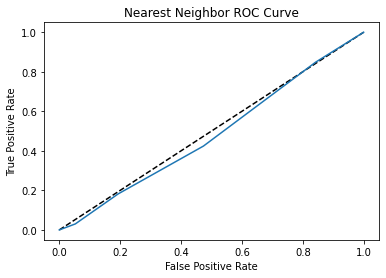

In [ ]:
y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
plt.plot([0,1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='K Nearest Neighbor')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Nearest Neighbor ROC Curve')
plt.show();

# Random Forest

In [ ]:
randomForest = RandomForestClassifier()

In [ ]:
randomForest.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions = randomForest.predict(X_test)

In [ ]:
accuracy = randomForest.score(X_test, Y_test)

In [ ]:
if accuracy>best_accuracy:
    best_algo="Random Forest Model"
    best_accuracy=accuracy
print("Accuracy = ", accuracy)

Accuracy =  0.8666666666666667


In [ ]:
cm = metrics.confusion_matrix(Y_test, predictions)

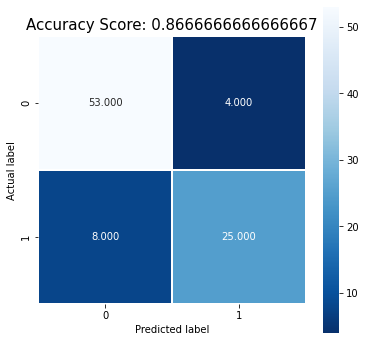

In [ ]:
plotConfusionMatrix(cm = cm, accuracy = accuracy)

In [ ]:
from operator import truediv
tp = np.diag(cm)
prec = list(map(truediv, tp, np.sum(cm, axis=0)))
rec = list(map(truediv, tp, np.sum(cm, axis=1)))
print("Accuracy = ",tp.sum()/cm.sum())

print("Avg Precision = {}\nAvg Recall = {}".format(np.sum(prec)/2, np.sum(rec)/2))


Accuracy =  0.8666666666666667
Avg Precision = 0.8654607122668174
Avg Recall = 0.8437001594896332


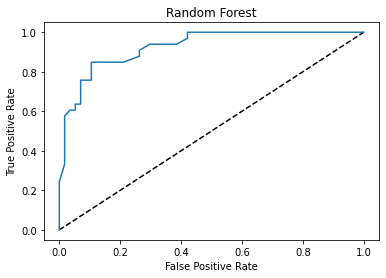

In [ ]:
y_pred_prob = randomForest.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
plt.plot([0,1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest')
plt.show();

# Decision Tree

In [ ]:
dtree = tree.DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
accuracy = dtree.score(X_test, Y_test)

In [ ]:
if accuracy>best_accuracy:
    best_algo="Decision Tree Model"
    best_accuracy=accuracy
print("Accuracy = ", accuracy)

Accuracy =  0.7111111111111111


In [ ]:
cm = metrics.confusion_matrix(Y_test, predictions)

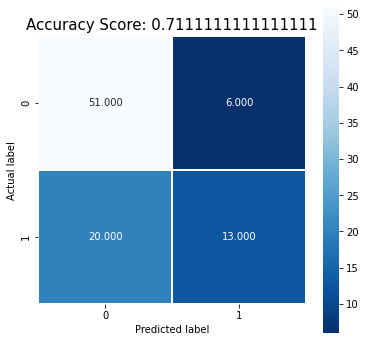

In [ ]:
plotConfusionMatrix(cm = cm, accuracy = accuracy)

In [ ]:
from operator import truediv
tp = np.diag(cm)
prec = list(map(truediv, tp, np.sum(cm, axis=0)))
rec = list(map(truediv, tp, np.sum(cm, axis=1)))
print("Accuracy = ",tp.sum()/cm.sum())

print("Avg Precision = {}\nAvg Recall = {}".format(np.sum(prec)/2, np.sum(rec)/2))


Accuracy =  0.7111111111111111
Avg Precision = 0.7012601927353596
Avg Recall = 0.6443381180223285


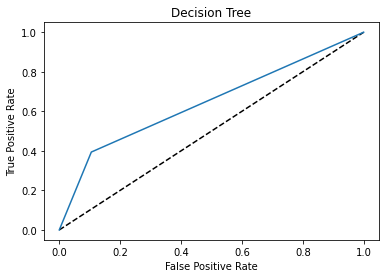

In [ ]:
y_pred_prob = dtree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
plt.plot([0,1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree')
plt.show();

# Naive Bayes

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
predictions = gnb.predict(X_test)

In [ ]:
accuracy = gnb.score(X_test, Y_test)

In [ ]:
if accuracy>best_accuracy:
    best_algo="Naive Bayes Model"
    best_accuracy=accuracy
print("Accuracy = ", accuracy)

Accuracy =  0.7777777777777778


In [ ]:
cm = metrics.confusion_matrix(Y_test, predictions)

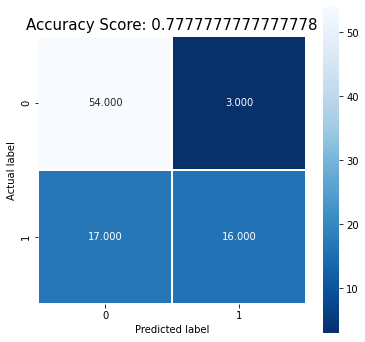

In [ ]:
plotConfusionMatrix(cm = cm, accuracy = accuracy)

In [ ]:
from operator import truediv
tp = np.diag(cm)
prec = list(map(truediv, tp, np.sum(cm, axis=0)))
rec = list(map(truediv, tp, np.sum(cm, axis=1)))
print("Accuracy = ",tp.sum()/cm.sum())
print("Avg Precision = {}\nAvg Recall = {}".format(np.sum(prec)/2, np.sum(rec)/2))

Accuracy =  0.7777777777777778
Avg Precision = 0.8013343217197924
Avg Recall = 0.7161084529505581


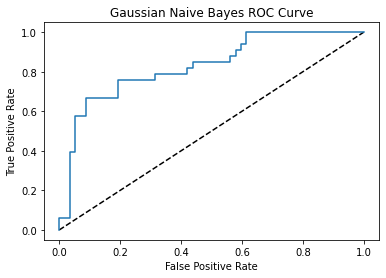

In [ ]:
y_pred_prob = gnb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='GNB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayes ROC Curve')
plt.show();

# **Best Output**

In [ ]:
print("Model with most accuracy:",best_algo)
print("Most achieved accuracy:",best_accuracy)

Model with most accuracy: Random Forest Model
Most achieved accuracy: 0.8666666666666667
